Nome: Daniel Oliveira dos Santos            
Matrícula: 564307         
Nível: Mestrado              
Email: danieloliveirafff@gmail.com          
Área: Ciência da Computação         
GitHub: https://github.com/Danieloliver1           
Segundo Exercício.

In [1]:

# Tratamento de dados
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento de dados para separar treino, teste e normalização
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


sns.set_palette("Accent")
sns.set_style("darkgrid")

In [2]:
link_california = r'https://raw.githubusercontent.com/Danieloliver1/UFC_mestrado/main/Sigaa_UFC/1_semestre/aprendizagem_automatica/lista_01_ama/california.csv?token=GHSAT0AAAAAACPK6ODCUTNZK2BYDXYRMRS4ZPMUVUQ'


In [3]:
dados = np.genfromtxt( link_california, delimiter=',') # numpy

In [4]:
dados.shape

(1000, 9)

##Questão 2
##Considere o conjunto de dados disponível em california.csv, organizado em 9
##colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída.

##Os 8 atributos são usados na predição da mediana de preços de casas em dis-
##tritos da Califórnia na década de 1990.

#a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

In [5]:

# passando os valore de x
# Selecionando todas as colunas exceto a última
X = dados[:,:-1]

# passando os valore de y
# Pegando somente a última coluna
y = dados[:, -1]

In [6]:
X.shape

(1000, 8)

In [7]:
# X[:,1]

#Normalizando os dados

##Separando para dados de treino e dados de testes.

In [8]:

# 1. Normalizando os dados de entrada usando MinMaxScaler
normalizando_minmax = MinMaxScaler()
x_normalizando = normalizando_minmax.fit_transform(X)


# # 2. Normalizando os dados de saída usando StandardScaler
standard_scaler = StandardScaler()
y_normalizando = standard_scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Dividindo os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Adicionando a primeira coluna de 1s manualmente
x_treino = np.hstack((np.ones((x_treino.shape[0], 1)), x_treino))
x_teste =  np.hstack((np.ones((x_teste.shape[0], 1)), x_teste))

In [10]:
# x_treino[:,0]

##b) Treine 13 modelos de regressão polinomial, com ordens de 1 a 13. Você
##pode usar o algoritmo OLS.

In [11]:
def regressao_ols(matriz_x, y):
    """
    Função que calcula os parâmetros do modelo de regressão linear usando o método dos mínimos quadrados ordinários (OLS).

    Parâmetros:
    - matriz_x: array-like, matriz de características onde cada linha representa uma observação e cada coluna uma característica
    - y: array-like, vetor de valores alvo correspondentes às observações

    Retorna:
    - theta: array, vetor de parâmetros do modelo de regressão linear
    """
    # Verifica se a primeira coluna de uns já está presente na matriz de características
    if np.all(x_treino[:, 0] == 1):
        # Se a primeira coluna já for composta de uns, não adicionamos uma nova coluna
        matriz_x_com_intercepto = matriz_x
    else:
        # Caso contrário, adicionamos a primeira coluna de uns à matriz de características
        matriz_x_com_intercepto = np.hstack((np.ones((matriz_x.shape[0], 1)), matriz_x))

    # Calcula os parâmetros do modelo de regressão linear usando OLS
    matriz_xt_x = matriz_x_com_intercepto.T @ matriz_x_com_intercepto
    inverso_matriz_xt_x = np.linalg.inv(matriz_xt_x)
    theta = inverso_matriz_xt_x @ matriz_x_com_intercepto.T @ y

    return theta




In [12]:
def polinomial(matriz_x, grau):
    """
    Função que gera um polinômio de um determinado grau para cada coluna de uma matriz de entrada.

    Parâmetros:
    - matriz_x: array-like, matriz de entrada onde cada coluna representa uma variável
    - grau: int, grau do polinômio

    Retorna:
    - matriz: array, matriz onde cada coluna representa um termo do polinômio para cada coluna de matriz_x
    """
    # Criando um novo array para armazenar as potências
    matriz = np.empty((matriz_x.shape[0], 0))

        # Verifica se a primeira coluna de uns já está presente na matriz de características
    if np.all(x_treino[:, 0] == 1):
        # Se a primeira coluna já for composta de uns, não adicionamos uma nova coluna
        matriz_x = matriz_x
    else:
        # Caso contrário, adicionamos a primeira coluna de uns à matriz de características
        matriz_x = np.hstack((np.ones((matriz_x.shape[0], 1)), matriz_x))


    # Iterando sobre as colunas da matriz de entrada
    for coluna in range(1, matriz_x.shape[1]):  # Começa do índice 1 para ignorar a coluna de uns já adicionada
        coluna_original = matriz_x[:, coluna]  # Selecionando a coluna original
        colunas_potencias = np.empty((matriz_x.shape[0], 0))  # Inicializando um array para armazenar as potências da coluna atual
        # Iterando sobre os graus do polinômio
        for j in range(1, grau + 1):
            # Calculando as potências dos elementos da coluna e armazenando no array
            potencia = coluna_original ** j
            colunas_potencias = np.concatenate((colunas_potencias, potencia[:, np.newaxis]), axis=1)
        # Adicionando as potências como novas colunas ao array
        matriz = np.concatenate((matriz, colunas_potencias), axis=1)
    matriz = np.hstack((np.ones((matriz.shape[0], 1)), matriz))

    return matriz



In [13]:
regressao_ols(x_treino,y_treino)

array([-3.22022746e+01,  4.61626456e-01,  1.27689844e-02, -1.52752350e-01,
        8.71939284e-01,  1.50930361e-05, -2.92778034e-01, -3.74892548e-01,
       -3.86166139e-01])

In [14]:

regressao_ols(polinomial(x_treino, 1),y_treino)

array([-3.22022746e+01,  4.61626456e-01,  1.27689844e-02, -1.52752350e-01,
        8.71939284e-01,  1.50930361e-05, -2.92778034e-01, -3.74892548e-01,
       -3.86166139e-01])

In [15]:
# Esta função tem como objetivo de calcular o resultado de y previsto de acordo com a função polinomial e seus coeficientes

def treinando_modelo(x, y, grau):

  # Calculando o polinomio da função
  funcao_polinomial = polinomial(x, grau)

  # Calculando os coeficientes da função
  w = regressao_ols(funcao_polinomial , y)

  # Calculando os valores previstos de y
  y_previsto =  np.dot(funcao_polinomial, w)

  return y_previsto


# Exemplo como a função funciona
# y_1 = w[0] + x_treino_de_terceira_ordem[:,1] * w[1] + x_treino_de_terceira_ordem[:,2]*w[2] + x_treino_de_terceira_ordem[:,3]*w[3]


##c) Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento
##e no teste para cada modelo. Faça um gráfico para o treino e um gráfico
##para o teste.

In [16]:
# Função para calcular (raiz quadrada do erro quadrático médio) (RMSE)
def raiz_erro_quadratico_medio(y_true, y_pred):
    """
    Calcula o erro quadrático médio

    Parâmetros:
    - y: vetor de saída
    - y_pred: vetor de previsão do y

    Retorna:
    - MSE: vetor calculado erro quadrático médio
    """

    if len(y_true) == 0:
        return None
    MSE = ((y_true - y_pred) ** 2).sum() / len(y_true)
    RMSE = np.sqrt(MSE)
    return RMSE


#Treino

1 RMSE no conjunto de treino: 0.7312392435921928
2 RMSE no conjunto de treino: 0.7039691692391947
3 RMSE no conjunto de treino: 0.6744256075755506
4 RMSE no conjunto de treino: 6.522928275137313
5 RMSE no conjunto de treino: 25.69404187356733
6 RMSE no conjunto de treino: 10.203501947021396
7 RMSE no conjunto de treino: 13.833679416724047
8 RMSE no conjunto de treino: 21.976794636169878
9 RMSE no conjunto de treino: 213.0923630542257
10 RMSE no conjunto de treino: 648.8154061154088
11 RMSE no conjunto de treino: 382.3829012519073
12 RMSE no conjunto de treino: 2745.5568695096463
13 RMSE no conjunto de treino: 15175.37771409702


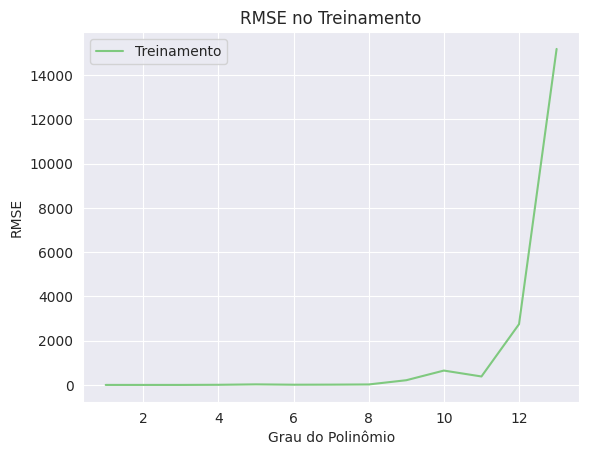

In [17]:
# Este grafico exibi todos os graus

# Definindo listas para armazenar as previsões e RMSEs
y_pred_treino = []
rmse_treino = []

graus = list(range(1, 14))

# Desnormalizar y_treino
y_treino_desnormalizado = standard_scaler.inverse_transform(y_treino.reshape(-1, 1)).flatten()

# Loop sobre os diferentes graus de polinômio
for grau in range(1, len(graus)+1):
    # Fazer previsões nos dados de treinamento para o grau atual
    y_pred_atual = treinando_modelo(x_treino, y_treino, grau)

    # Adicionar as previsões ao conjunto de previsões de treinamento
    y_pred_treino.append(y_pred_atual)

    # Calcular o RMSE para as previsões atuais
    rmse_atual = raiz_erro_quadratico_medio(y_treino_desnormalizado, standard_scaler.inverse_transform(y_pred_atual.reshape(-1, 1)).flatten())

    # Adicionar o RMSE à lista de RMSEs de treinamento
    rmse_treino.append(rmse_atual)
    print(f"{grau} RMSE no conjunto de treino:", rmse_atual)

#Plotar RMSE no treinamento
plt.plot(range(1, len(graus)+1), rmse_treino, label='Treinamento')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE no Treinamento')
plt.legend()
plt.show()


In [18]:
def coeficiente_determinacao(y_real, y_previsto):
    """
    Esta função tem como objetivo de pegar cada grau e calcular o r2
    Parâmetros:
    - y: vetor de saída
    - y_previsto: valor de saída y ajustado

    Retorna:
    - R2: Coeficiente de determinação

    """
    # Calcular a média dos valores reais
    y_medio = np.mean(y_real)

    # Calcular a soma dos quadrados totais (SST)
    SST = np.sum((y_real - y_medio) ** 2)

    # Calcular a soma dos quadrados dos resíduos (SSE)
    SSE = np.sum((y_real - y_previsto) ** 2)

    # Calcular o coeficiente de determinação (R²)
    R2 = 1 - (SSE / SST)

    return R2


In [19]:

for i in range(len(y_pred_treino)):
  print(f'resultao de treino Grau:{i+1}- R² = {coeficiente_determinacao(y_treino,y_pred_treino[i]) * 100:.2f}%')

resultao de treino Grau:1- R² = 66.50%
resultao de treino Grau:2- R² = 68.95%
resultao de treino Grau:3- R² = 71.50%
resultao de treino Grau:4- R² = -2566.05%
resultao de treino Grau:5- R² = -41266.36%
resultao de treino Grau:6- R² = -6423.50%
resultao de treino Grau:7- R² = -11891.07%
resultao de treino Grau:8- R² = -30162.94%
resultao de treino Grau:9- R² = -2845135.21%
resultao de treino Grau:10- R² = -26376858.16%
resultao de treino Grau:11- R² = -9161668.87%
resultao de treino Grau:12- R² = -472327464.06%
resultao de treino Grau:13- R² = -14429836793.71%


Este grafico exibi o grau 1 até 6 para melhor visualição entre os primeiros graus

1 RMSE no conjunto de treino: 0.7312392435921928
2 RMSE no conjunto de treino: 0.7039691692391947
3 RMSE no conjunto de treino: 0.6744256075755506
4 RMSE no conjunto de treino: 6.522928275137313
5 RMSE no conjunto de treino: 25.69404187356733
6 RMSE no conjunto de treino: 10.203501947021396


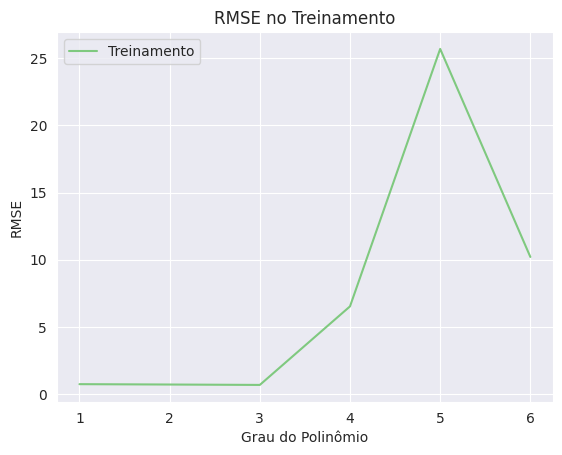

In [20]:
# este grafico exibi o grau 1 até 6 para melhor visualição entre os primeiros graus

# Definindo listas para armazenar as previsões e RMSEs
y_pred_treino = []
rmse_treino = []

graus = list(range(1, 7))

# Desnormalizar y_treino
y_treino_desnormalizado = standard_scaler.inverse_transform(y_treino.reshape(-1, 1)).flatten()

# Loop sobre os diferentes graus de polinômio
for grau in range(1, len(graus)+1):
    # Fazer previsões nos dados de treinamento para o grau atual
    y_pred_atual = treinando_modelo(x_treino, y_treino, grau)

    # Adicionar as previsões ao conjunto de previsões de treinamento
    y_pred_treino.append(y_pred_atual)

    # Calcular o RMSE para as previsões atuais
    rmse_atual = raiz_erro_quadratico_medio(y_treino_desnormalizado, standard_scaler.inverse_transform(y_pred_atual.reshape(-1, 1)).flatten())

    # Adicionar o RMSE à lista de RMSEs de treinamento
    rmse_treino.append(rmse_atual)
    print(f"{grau} RMSE no conjunto de treino:", rmse_atual)

#Plotar RMSE no treinamento
plt.plot(range(1, len(graus)+1), rmse_treino, label='Treinamento')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE no Treinamento')
plt.legend()
plt.show()

In [21]:
raiz_erro_quadratico_medio(y_treino_desnormalizado, standard_scaler.inverse_transform(treinando_modelo(x_treino, y_treino, 4).reshape(-1, 1)).flatten())

6.522928275137313

#Teste

In [22]:
def treinando_modelo_para_teste(x_treino, y_treino, x_teste, grau):
    # Calculando o polinomio da função para os dados de treinamento
    funcao_polinomial_treino = polinomial(x_treino, grau)

    # Calculando os coeficientes da função usando os dados de treinamento
    coeficientes = regressao_ols(funcao_polinomial_treino, y_treino)

    # Calculando o polinomio da função para os dados de teste
    funcao_polinomial_teste = polinomial(x_teste, grau)

    # Calculando os valores previstos de y
    y_previsto = np.dot(funcao_polinomial_teste, coeficientes)

    return y_previsto



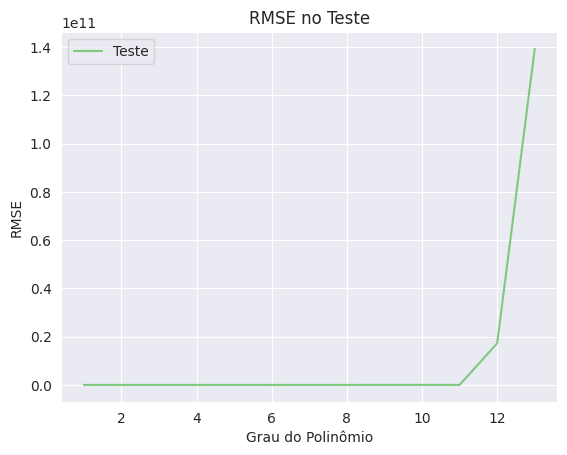

RMSE no conjunto de teste: [0.9031259929312626, 0.9022315837026762, 1.2365820503853677, 91.62833775056066, 4381.619782266544, 725.6119190362602, 52793.14919608449, 123841.13194322576, 14945739.009393474, 28253423.48302211, 15835185.605069727, 17244173916.951637, 139201182255.75797]


In [23]:


# este grafico exibi todos os graus

# Fazer previsões nos dados de teste para diferentes graus de polinômio
y_pred_teste = []
rmse_teste = []
y_pred_teste_normalizado = []

graus = list(range(1, 14))

y_teste_desnormalizado = standard_scaler.inverse_transform(y_teste.reshape(-1, 1)).flatten()

for grau in range(1, len(graus)+1):
    y_pred_teste_atual = treinando_modelo_para_teste(x_treino, y_treino, x_teste, grau)
    y_pred_teste_atual_desnormalizado = standard_scaler.inverse_transform(y_pred_teste_atual.reshape(-1, 1)).flatten()
    rmse_atual = raiz_erro_quadratico_medio(y_teste_desnormalizado, y_pred_teste_atual_desnormalizado)

    y_pred_teste_normalizado.append(y_pred_teste_atual)
    y_pred_teste.append(y_pred_teste_atual_desnormalizado)
    rmse_teste.append(rmse_atual)



# Plotar RMSE no teste

plt.plot(range(1, len(graus)+1), rmse_teste, label='Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE no Teste')
plt.legend()
plt.show()
print("RMSE no conjunto de teste:", rmse_teste)

In [24]:

for i in range(len(y_pred_teste)):
  print(f'resultao de teste Grau:{i+1}- R² = {coeficiente_determinacao(y_teste,y_pred_teste[i]) * 100:.2f}%')

resultao de teste Grau:1- R² = -302.40%
resultao de teste Grau:2- R² = -290.23%
resultao de teste Grau:3- R² = -356.46%
resultao de teste Grau:4- R² = -534031.05%
resultao de teste Grau:5- R² = -1225309238.07%
resultao de teste Grau:6- R² = -33622121.90%
resultao de teste Grau:7- R² = -177895873235.73%
resultao de teste Grau:8- R² = -978896293843.77%
resultao de teste Grau:9- R² = -14257481472510272.00%
resultao de teste Grau:10- R² = -50950701882090800.00%
resultao de teste Grau:11- R² = -16004950135491540.00%
resultao de teste Grau:12- R² = -18979851349757360340992.00%
resultao de teste Grau:13- R² = -1236784021379074299527168.00%


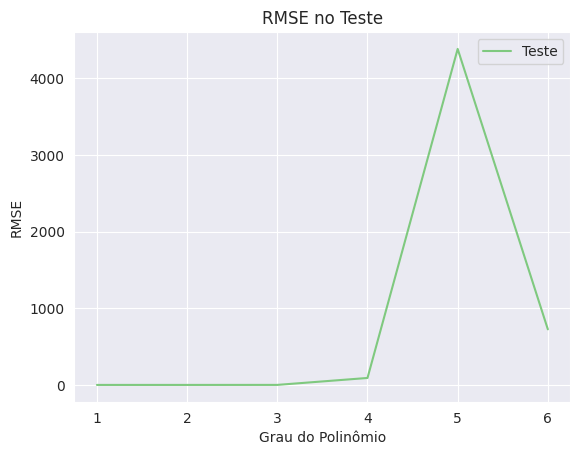

RMSE no conjunto de teste: [0.9031259929312626, 0.9022315837026762, 1.2365820503853677, 91.62833775056066, 4381.619782266544, 725.6119190362602]


In [25]:
# este grafico exibi o grau 1 até 6 para melhor visualição entre os primeiros graus

# Fazer previsões nos dados de teste para diferentes graus de polinômio
y_pred_teste = []
rmse_teste = []

graus = list(range(1, 7))

y_teste_desnormalizado = standard_scaler.inverse_transform(y_teste.reshape(-1, 1)).flatten()

for grau in range(1, len(graus)+1):

    y_pred_teste_atual = treinando_modelo_para_teste(x_treino, y_treino, x_teste, grau)
    y_pred_teste_atual_desnormalizado = standard_scaler.inverse_transform(y_pred_teste_atual.reshape(-1, 1)).flatten()

    rmse_atual = raiz_erro_quadratico_medio(y_teste_desnormalizado, y_pred_teste_atual_desnormalizado)

    y_pred_teste.append(y_pred_teste_atual_desnormalizado)
    rmse_teste.append(rmse_atual)


# Plotar RMSE no teste

plt.plot(range(1, len(graus)+1), rmse_teste, label='Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE no Teste')
plt.legend()
plt.show()
print("RMSE no conjunto de teste:", rmse_teste)

##d) Repita os 2 itens anteriores incluindo um termo de regularização L2
##(por exemplo, com fator λ = 0.01).

In [26]:
def OLS(matriz_x, y, alfa=0.01):
    """
    Função que calcula os parâmetros do modelo de regressão linear usando o método Ridge.

    Parâmetros:
    - matriz_x: array-like, matriz de características onde cada linha representa uma observação e cada coluna uma característica
    - y: array-like, vetor de valores alvo correspondentes às observações
    - alfa: float, parâmetro de regularização (padrão: 0.01)

    Retorna:
    - theta: array, vetor de parâmetros do modelo de regressão linear
    """
    # Verifica se a primeira coluna de uns já está presente na matriz de características
    if np.all(matriz_x[:, 0] == 1):
        # Se a primeira coluna já for composta de uns, não adicionamos uma nova coluna
        matriz_x_com_intercepto = matriz_x
    else:
        # Caso contrário, adicionamos a primeira coluna de uns à matriz de características
        matriz_x_com_intercepto = np.hstack((np.ones((matriz_x.shape[0], 1)), matriz_x))

    # Calcula os parâmetros do modelo de regressão linear usando Ridge
    matriz_xt_x = matriz_x_com_intercepto.T @ matriz_x_com_intercepto
    identidade = np.eye(matriz_x_com_intercepto.shape[1])  # Matriz identidade
    theta = np.linalg.inv(matriz_xt_x + alfa * identidade) @ matriz_x_com_intercepto.T @ y

    return theta



In [27]:
def treinando_modelo_treino(x, y, grau):

  # Calculando o polinomio da função
  funcao_polinomial = polinomial(x, grau)

  # Calculando os coeficientes da função
  w = OLS(funcao_polinomial , y)

  # Calculando os valores previstos de y
  y_previsto =  np.dot(funcao_polinomial, w)

  return y_previsto

#Com Treino regularização

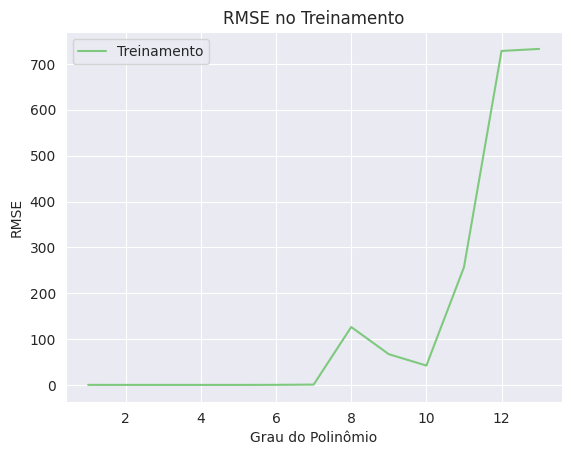

RMSE no conjunto de treino: [0.7330056881642036, 0.7043807026186566, 0.6758923705986636, 0.6726313920612447, 0.6636754108624036, 0.8405659141459806, 1.404777726654822, 126.75283647107743, 67.60683230038897, 42.80249756562551, 256.89748471558005, 727.9911401703024, 732.4287805858662]


In [28]:
# este grafico exibi todos os graus

y_pred_treino = []
rmse_treino = []

graus = list(range(1, 14))

# Desnormalizar y_treino
y_treino_desnormalizado = standard_scaler.inverse_transform(y_treino.reshape(-1, 1)).flatten()

# Loop sobre os diferentes graus de polinômio
for grau in range(1, len(graus)+1):
    # Fazer previsões nos dados de treinamento para o grau atual
    y_pred_atual = treinando_modelo_treino(x_treino, y_treino, grau)

    # Adicionar as previsões ao conjunto de previsões de treinamento
    y_pred_treino.append(y_pred_atual)

    # Calcular o RMSE para as previsões atuais
    rmse_atual = raiz_erro_quadratico_medio(y_treino_desnormalizado, standard_scaler.inverse_transform(y_pred_atual.reshape(-1, 1)).flatten())

    # Adicionar o RMSE à lista de RMSEs de treinamento
    rmse_treino.append(rmse_atual)

# Plotar RMSE no treinamento
plt.plot(range(1, len(graus)+1), rmse_treino, label='Treinamento')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE no Treinamento')
plt.legend()
plt.show()
print("RMSE no conjunto de treino:", rmse_treino)



In [29]:

for i in range(len(y_pred_treino)):
  print(f'resultao de teste Grau:{i+1}- R² = {coeficiente_determinacao(y_treino,y_pred_treino[i]) * 100:.2f}%')

resultao de teste Grau:1- R² = 66.33%
resultao de teste Grau:2- R² = 68.91%
resultao de teste Grau:3- R² = 71.38%
resultao de teste Grau:4- R² = 71.65%
resultao de teste Grau:5- R² = 72.40%
resultao de teste Grau:6- R² = 55.73%
resultao de teste Grau:7- R² = -23.65%
resultao de teste Grau:8- R² = -1006594.69%
resultao de teste Grau:9- R² = -286293.78%
resultao de teste Grau:10- R² = -114694.38%
resultao de teste Grau:11- R² = -4135153.21%
resultao de teste Grau:12- R² = -33207278.40%
resultao de teste Grau:13- R² = -33613359.01%


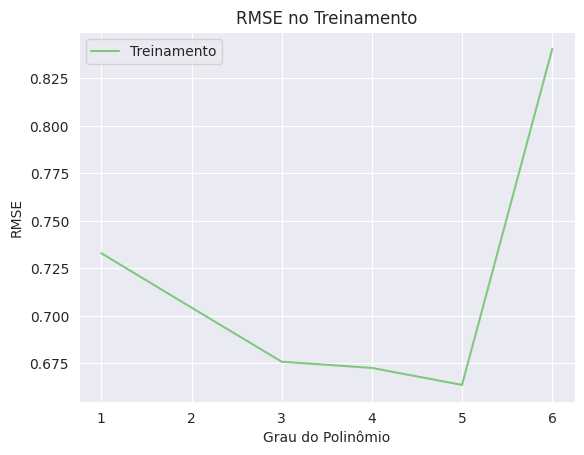

RMSE no conjunto de treino: [0.7330056881642036, 0.7043807026186566, 0.6758923705986636, 0.6726313920612447, 0.6636754108624036, 0.8405659141459806]


In [30]:
# este grafico exibi o grau 1 até 6 para melhor visualição entre os primeiros graus

# Definindo listas para armazenar as previsões e RMSEs
y_pred_treino = []
rmse_treino = []

graus = list(range(1, 7))

# Desnormalizar y_treino
y_treino_desnormalizado = standard_scaler.inverse_transform(y_treino.reshape(-1, 1)).flatten()

# Loop sobre os diferentes graus de polinômio
for grau in range(1, len(graus)+1):
    # Fazer previsões nos dados de treinamento para o grau atual
    y_pred_atual = treinando_modelo_treino(x_treino, y_treino, grau)

    # Adicionar as previsões ao conjunto de previsões de treinamento
    y_pred_treino.append(y_pred_atual)

    # Calcular o RMSE para as previsões atuais
    rmse_atual = raiz_erro_quadratico_medio(y_treino_desnormalizado, standard_scaler.inverse_transform(y_pred_atual.reshape(-1, 1)).flatten())

    # Adicionar o RMSE à lista de RMSEs de treinamento
    rmse_treino.append(rmse_atual)

# Plotar RMSE no treinamento
plt.plot(range(1, len(graus)+1), rmse_treino, label='Treinamento')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE no Treinamento')
plt.legend()
plt.show()
print("RMSE no conjunto de treino:", rmse_treino)

#Com Teste regularização

In [31]:
def treinando_modelo_teste(x_treino, y_treino, x_teste, grau):
    # Calculando o polinomio da função para os dados de treinamento
    funcao_polinomial_treino = polinomial(x_treino, grau)

    # Calculando os coeficientes da função usando os dados de treinamento
    coeficientes = OLS(funcao_polinomial_treino, y_treino)

    # Calculando o polinomio da função para os dados de teste
    funcao_polinomial_teste = polinomial(x_teste, grau)

    # Calculando os valores previstos de y
    y_previsto = np.dot(funcao_polinomial_teste, coeficientes)

    return y_previsto


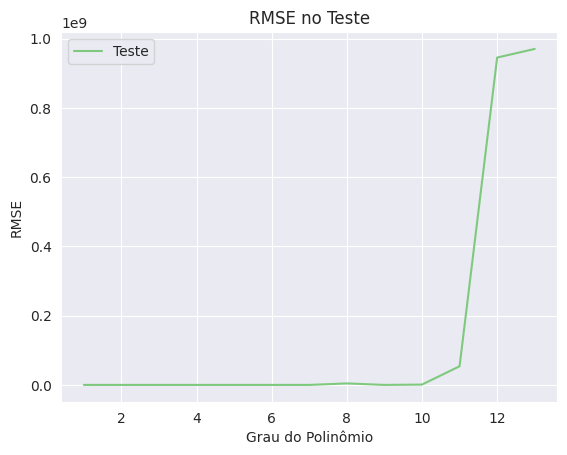

RMSE no conjunto de teste: [0.9170288117664903, 0.906172885206869, 1.1737329111528967, 1.0937134022417043, 5.3568000263792355, 25.549853031329768, 1586.1692454981521, 4355931.040013894, 36046.6520571704, 1018122.48215169, 53927347.89516082, 945434359.4288024, 970338328.8292322]


In [32]:
# este grafico exibi todos os graus

# Fazer previsões nos dados de teste para diferentes graus de polinômio
y_pred_teste = []
rmse_teste = []

graus = list(range(1, 14))

y_teste_desnormalizado = standard_scaler.inverse_transform(y_teste.reshape(-1, 1)).flatten()

for grau in range(1, len(graus)+1):
    y_pred_teste_atual = treinando_modelo_teste(x_treino, y_treino, x_teste, grau)
    y_pred_teste_atual_desnormalizado = standard_scaler.inverse_transform(y_pred_teste_atual.reshape(-1, 1)).flatten()
    y_teste_desnormalizado = standard_scaler.inverse_transform(y_teste.reshape(-1, 1)).flatten()
    rmse_atual = raiz_erro_quadratico_medio(y_teste_desnormalizado, y_pred_teste_atual_desnormalizado)

    y_pred_teste.append(y_pred_teste_atual_desnormalizado)
    rmse_teste.append(rmse_atual)

# Plotar RMSE no teste
plt.plot(range(1, len(graus)+1), rmse_teste, label='Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE no Teste')
plt.legend()
plt.show()
print("RMSE no conjunto de teste:", rmse_teste)

In [33]:
for i in range(len(y_pred_teste)):
  print(f'resultao de teste Grau:{i+1}- R² = {coeficiente_determinacao(y_teste,y_pred_teste[i]) * 100:.2f}%')

resultao de teste Grau:1- R² = -305.05%
resultao de teste Grau:2- R² = -290.53%
resultao de teste Grau:3- R² = -347.06%
resultao de teste Grau:4- R² = -330.95%
resultao de teste Grau:5- R² = -1959.29%
resultao de teste Grau:6- R² = -42399.27%
resultao de teste Grau:7- R² = -160619336.68%
resultao de teste Grau:8- R² = -1211072220455197.00%
resultao de teste Grau:9- R² = -82934259470.69%
resultao de teste Grau:10- R² = -66161894441797.98%
resultao de teste Grau:11- R² = -185620588768801184.00%
resultao de teste Grau:12- R² = -57051987863125893120.00%
resultao de teste Grau:13- R² = -60097221159123902464.00%


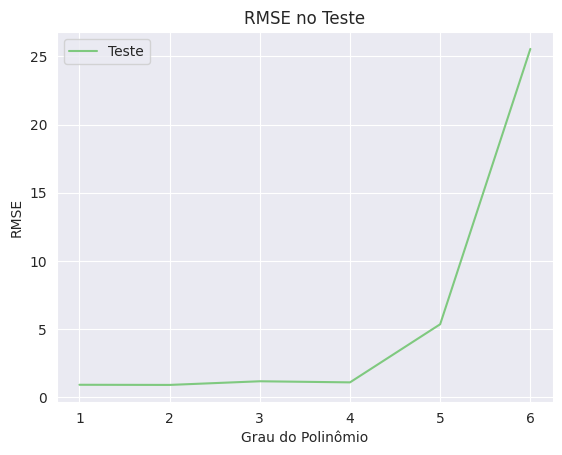

RMSE no conjunto de teste: [0.9170288117664903, 0.906172885206869, 1.1737329111528967, 1.0937134022417043, 5.3568000263792355, 25.549853031329768]


In [34]:
# este grafico exibi o grau 1 até 6 para melhor visualição entre os primeiros graus

# Fazer previsões nos dados de teste para diferentes graus de polinômio
y_pred_teste = []
rmse_teste = []

graus = list(range(1, 7))

y_teste_desnormalizado = standard_scaler.inverse_transform(y_teste.reshape(-1, 1)).flatten()

for grau in range(1, len(graus)+1):
    y_pred_teste_atual = treinando_modelo_teste(x_treino, y_treino, x_teste, grau)
    y_pred_teste_atual_desnormalizado = standard_scaler.inverse_transform(y_pred_teste_atual.reshape(-1, 1)).flatten()
    y_teste_desnormalizado = standard_scaler.inverse_transform(y_teste.reshape(-1, 1)).flatten()
    rmse_atual = raiz_erro_quadratico_medio(y_teste_desnormalizado, y_pred_teste_atual_desnormalizado)

    y_pred_teste.append(y_pred_teste_atual_desnormalizado)
    rmse_teste.append(rmse_atual)

# Plotar RMSE no teste
plt.plot(range(1, len(graus)+1), rmse_teste, label='Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE no Teste')
plt.legend()
plt.show()
print("RMSE no conjunto de teste:", rmse_teste)